In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import ssl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *

# Turn off code warnings (this is not recommended for routine use)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [16]:
import requests
dataset_temp=pd.read_csv('faults.csv') 
dataset_temp.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [17]:
data = dataset_temp.iloc[:,:27]
data[:4]
#Выделим колонки в отдельный список
headers = list(data.columns.values)

In [18]:
#Нормализуем параметры
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.head()
#при норм-ции стираются названия колнок, надо восстановить
df_norm.columns = headers
df_norm.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.950733,-0.946167,-0.959296,-0.959291,-0.996528,-0.997128,-0.995262,-0.995864,-0.251232,-0.342593,...,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.242832,-0.609987,-0.609985,-0.998611,-0.998468,-0.996805,-0.998077,-0.172414,-0.203704,...,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.027501,-0.761620,-0.761619,-0.999096,-0.998851,-0.998017,-0.998668,-0.024631,-0.185185,...,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,0.001755,-0.944125,-0.944120,-0.997720,-0.997894,-0.995152,-0.996765,-0.024631,-0.175926,...,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,0.523698,-0.924294,-0.924257,-0.968464,-0.988896,-0.971462,-0.957437,-0.635468,-0.175926,...,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000


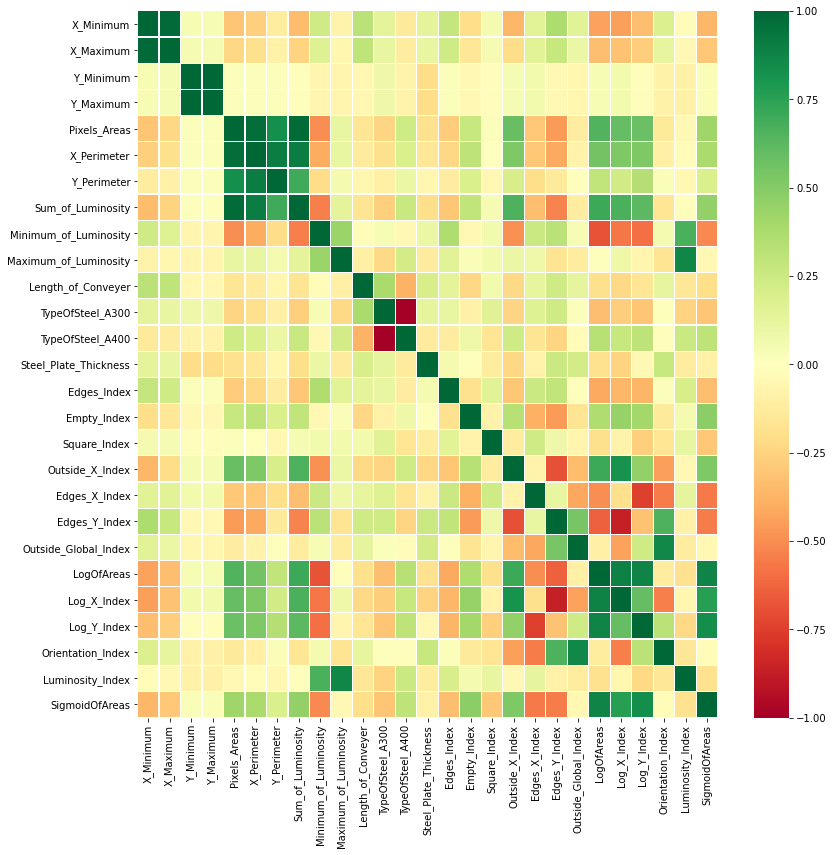

In [19]:
# №строю матрицу корреляций
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(df_norm.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

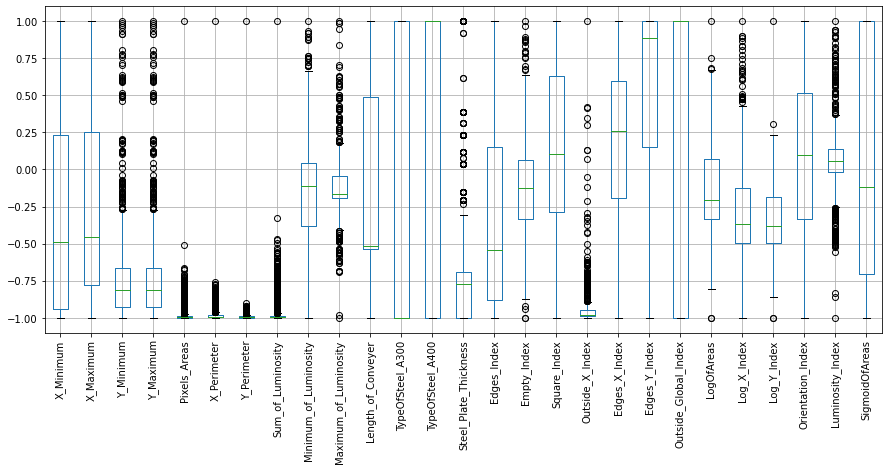

In [21]:
# посмотрим на boxplot, есть ли выбросы
boxplot = df_norm.boxplot(figsize=(15,6), rot=90)

In [22]:
# Можно заметить, что в данном графике есть выбросы в некоторых атрибутах.

# Можно удалить все элементы, выходящие за 0.05ый и 0.95ий квартили. Посчитаем эти квартили для всех колонок:
low = .05
high = .95
q = df_norm.quantile([low,high])
def quant(x):
    list_ = []
    for i in range(len(x)):
        if (x[i]<=q.iloc[0, i]):
            list_.append(q.iloc[0, i])
        elif(x[i]>=q.iloc[1, i]):
            list_.append(q.iloc[1, i])
        else:
            list_.append(x[i])
        
    return pd.Series(list_) 
filt_df = df_norm.apply(quant, axis=1)

In [23]:
filt_df.columns = df_norm.columns
filt_df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.950733,-0.946167,-0.959296,-0.959291,-0.996528,-0.997128,-0.995262,-0.995864,-0.251232,-0.342593,...,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.242832,-0.609987,-0.609985,-0.998611,-0.998468,-0.996805,-0.998077,-0.172414,-0.203704,...,-0.993367,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.027501,-0.761620,-0.761619,-0.999096,-0.998660,-0.998017,-0.998668,-0.024631,-0.185185,...,-0.993367,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,0.001755,-0.944125,-0.944120,-0.997720,-0.997894,-0.995152,-0.996765,-0.024631,-0.175926,...,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.844152,0.026325,-0.086947
4,0.512023,0.523698,-0.924294,-0.924257,-0.968464,-0.988896,-0.971462,-0.957437,-0.635468,-0.175926,...,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.047456,0.844152,-0.025350,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,-0.707918,-0.680515,-0.950841,-0.950840,-0.996449,-0.990045,-0.997686,-0.993998,0.172414,-0.037037,...,-0.956313,0.022930,0.426860,-1.0,-0.125402,-0.173344,-0.434522,-0.432693,0.220597,0.376617
1937,-0.831085,-0.799883,-0.948560,-0.948559,-0.996266,-0.991959,-0.997466,-0.994073,0.103448,-0.111111,...,-0.951281,0.400568,0.386927,-1.0,-0.116513,-0.141466,-0.422124,-0.455893,0.146496,0.585244
1938,-0.829912,-0.801053,-0.941442,-0.941442,-0.996201,-0.992725,-0.997686,-0.993560,0.182266,-0.046296,...,-0.954712,0.441964,0.331232,-1.0,-0.113441,-0.162381,-0.447672,-0.487366,0.223766,0.336890
1939,-0.839296,-0.805734,-0.935939,-0.935936,-0.994537,-0.981813,-0.994931,-0.990947,0.152709,-0.046296,...,-0.947850,-0.338880,0.284573,-1.0,-0.049215,-0.121921,-0.299598,-0.061482,0.196587,0.981612


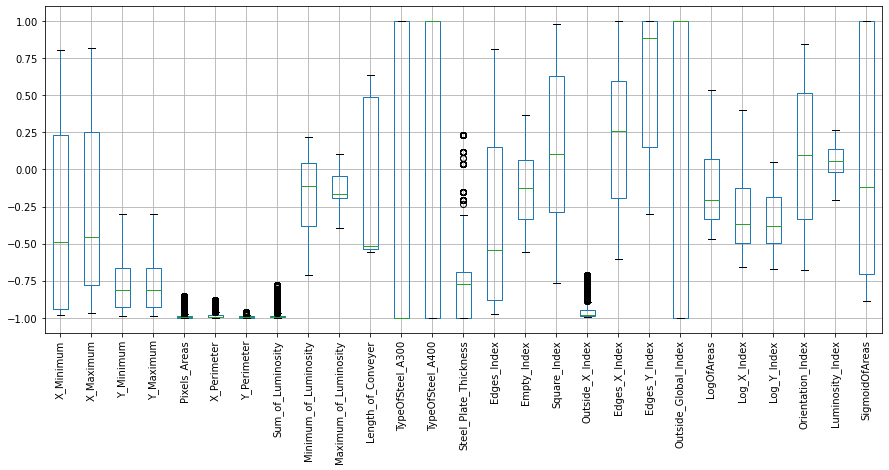

In [24]:
boxplot = filt_df.boxplot(figsize=(15,6), rot=90)

In [25]:
# выбросы остались(

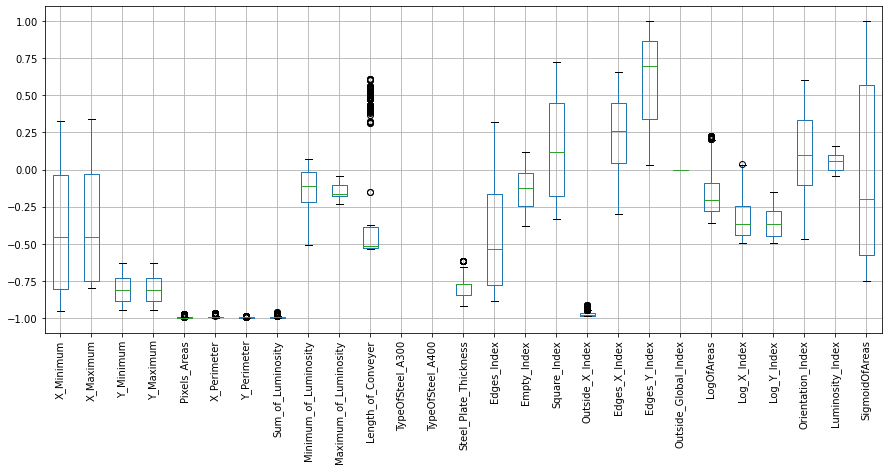

In [26]:
low = .2
high = .8
quant_df = df_norm.quantile([low, high])
filt_df_2 = df_norm.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)
boxplot = filt_df_2.boxplot(figsize=(15,6), rot=90)

In [27]:
# Удаление мультиколлинеарности

# Удалим из таблицы значения с корреляцией, большей чем 95%: некоторые атрибуты имеют сильную корреляцию
# с другими атрибутами, нет смысла использовать два атрибута совместно.
# создаем матрицу корреляций
corr_matrix = df_norm.corr().abs()

# Выбираем верхний треугольник матрицы
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Ищем индексы колонок с корреляцией большей чем 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

['X_Maximum', 'Y_Maximum', 'X_Perimeter', 'Sum_of_Luminosity', 'TypeOfSteel_A400']


In [28]:
df_norm = df_norm.drop(df_norm[to_drop], axis=1)
df_norm.head()

,X_Minimum,Y_Minimum,Pixels_Areas,Y_Perimeter,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.950733,-0.959296,-0.996528,-0.995262,-0.251232,-0.342593,0.622575,1.0,-0.692308,-0.899920,...,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.609987,-0.998611,-0.996805,-0.172414,-0.203704,0.622575,1.0,-0.692308,0.536777,...,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.761620,-0.999096,-0.998017,-0.024631,-0.185185,0.396825,1.0,-0.538462,0.951367,...,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,-0.944125,-0.997720,-0.995152,-0.024631,-0.175926,-0.555556,-1.0,0.923077,0.464429,...,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,-0.924294,-0.968464,-0.971462,-0.635468,-0.175926,-0.555556,-1.0,0.115385,-0.860330,...,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000


In [29]:
print('Количество значений 1го класса: ', dataset_temp[dataset_temp['Pastry']==1].shape)
print('Количество значений 2го класса: ', dataset_temp[dataset_temp['Z_Scratch']==1].shape)
print('Количество значений 3го класса: ', dataset_temp[dataset_temp['K_Scatch']==1].shape)
print('Количество значений 4го класса: ', dataset_temp[dataset_temp['Stains']==1].shape)
print('Количество значений 5го класса: ', dataset_temp[dataset_temp['Dirtiness']==1].shape)
print('Количество значений 6го класса: ', dataset_temp[dataset_temp['Bumps']==1].shape)
print('Количество значений 7го класса: ', dataset_temp[dataset_temp['Other_Faults']==1].shape)

Количество значений 1го класса:  (158, 34)
Количество значений 2го класса:  (190, 34)
Количество значений 3го класса:  (391, 34)
Количество значений 4го класса:  (72, 34)
Количество значений 5го класса:  (55, 34)
Количество значений 6го класса:  (402, 34)
Количество значений 7го класса:  (673, 34)


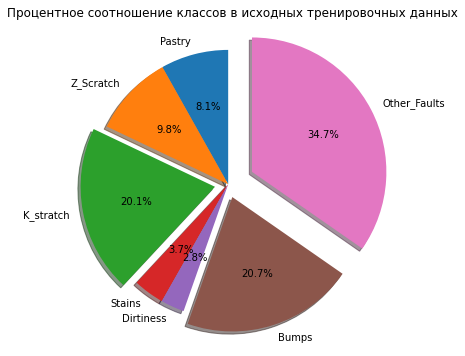

In [30]:
# Построем pie-график
labels = 'Pastry', 'Z_Scratch', 'K_stratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'
sizes = [158, 190, 391, 72, 55, 402, 673]
explode = (0, 0, 0.1, 0, 0, 0.1, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(6,6))
plt.title('Процентное соотношение классов в исходных тренировочных данных')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [31]:
#c несбалансированными данными хорошо работает random forest
output_y = dataset_temp.iloc[:,27:]
#input_x = dataset_temp.iloc[:,:27]
input_x = df_norm
df_norm.head(30)

,X_Minimum,Y_Minimum,Pixels_Areas,Y_Perimeter,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-0.950733,-0.959296,-0.996528,-0.995262,-0.251232,-0.342593,0.622575,1.0,-0.692308,-0.899920,...,-0.992681,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532
1,-0.243402,-0.609987,-0.998611,-0.996805,-0.172414,-0.203704,0.622575,1.0,-0.692308,0.536777,...,-0.995197,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736
2,-0.027566,-0.761620,-0.999096,-0.998017,-0.024631,-0.185185,0.396825,1.0,-0.538462,0.951367,...,-0.994968,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066
3,0.000587,-0.944125,-0.997720,-0.995152,-0.024631,-0.175926,-0.555556,-1.0,0.923077,0.464429,...,-0.991537,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947
4,0.512023,-0.924294,-0.968464,-0.971462,-0.635468,-0.175926,-0.555556,-1.0,0.115385,-0.860330,...,-0.974611,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000
5,-0.495601,-0.985588,-0.991772,-0.990524,-0.369458,-0.166667,-0.435626,-1.0,-1.000000,0.245981,...,-0.985361,0.086851,1.000000,1.0,0.023327,-0.466013,-0.089159,0.880870,-0.058867,0.971396
6,-0.515543,-0.979700,-0.881430,-0.952510,-0.773399,0.500000,0.622575,-1.0,-0.153846,-0.016077,...,-0.958600,-0.738028,0.917402,1.0,0.497409,-0.121921,0.229530,0.928179,0.557587,1.000000
7,-0.777126,-0.968535,-0.998297,-0.997906,0.221675,0.250000,0.622575,-1.0,-0.153846,-0.547227,...,-0.989936,0.815544,1.000000,1.0,-0.254675,-0.495871,-0.389015,0.504010,0.441804,-0.507605
8,-0.612903,-0.934902,-0.996567,-0.997245,-0.477833,0.027778,0.622575,-1.0,-0.153846,-0.213826,...,-0.985819,0.729505,1.000000,1.0,-0.131382,-0.413725,-0.335478,0.504010,0.071542,-0.000454
9,-0.913196,-0.880990,-0.980295,-0.981709,-0.477833,-0.018519,0.622575,-1.0,-0.153846,-0.823754,...,-0.981702,-0.323458,0.962169,1.0,0.178364,-0.348671,0.040130,0.909921,0.138087,1.000000


In [32]:
output_y1 = dataset_temp.iloc[:,27:]
input_x_ = filt_df

from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
targets1=(output_y1.iloc[:,:]==1).idxmax(1)
Y_=le1.fit_transform(targets1)
targets1

from sklearn.model_selection import train_test_split
X_train_22_, X_test_22_, y_train_22_, y_test_22_ = train_test_split(input_x_, Y_, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
model_=RandomForestClassifier(n_estimators=100)
model_.fit(X_train_22_,y_train_22_)

headers_ = list(X_train_22_.columns.values)
feature_imp_ = pd.Series(model_.feature_importances_,index=headers_).sort_values(ascending=False)
model_pred_ = model_.predict(X_test_22_)
print(classification_report(y_test_22_, model_pred_))
model_.score(X_test_22_, y_test_22_)
feature_imp_

              precision    recall  f1-score   support

           0       0.71      0.63      0.67       119
           1       0.69      0.79      0.73        14
           2       0.95      0.98      0.96       124
           3       0.70      0.78      0.74       201
           4       0.77      0.55      0.64        49
           5       0.83      0.96      0.89        25
           6       0.91      0.82      0.87        51

    accuracy                           0.78       583
   macro avg       0.79      0.79      0.79       583
weighted avg       0.78      0.78      0.78       583



Length_of_Conveyer       0.066194
Steel_Plate_Thickness    0.058324
Sum_of_Luminosity        0.056441
Outside_X_Index          0.055469
Pixels_Areas             0.052614
Log_X_Index              0.045742
X_Maximum                0.043888
LogOfAreas               0.043706
X_Minimum                0.042169
Square_Index             0.038642
Orientation_Index        0.038218
SigmoidOfAreas           0.037360
Minimum_of_Luminosity    0.036496
Y_Maximum                0.034070
Edges_Index              0.034046
Y_Minimum                0.033992
Maximum_of_Luminosity    0.032120
Luminosity_Index         0.031669
Empty_Index              0.031498
Edges_X_Index            0.028827
Edges_Y_Index            0.028537
X_Perimeter              0.028129
Y_Perimeter              0.026698
TypeOfSteel_A400         0.024700
Log_Y_Index              0.024600
TypeOfSteel_A300         0.022392
Outside_Global_Index     0.003457
dtype: float64

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
output_y = dataset_temp.iloc[:,27:]
input_x = dataset_temp.iloc[:,:27]
targets=(output_y.iloc[:,:]==1).idxmax(1)
Y=le.fit_transform(targets)
targets

0             Pastry
1             Pastry
2             Pastry
3             Pastry
4             Pastry
            ...     
1936    Other_Faults
1937    Other_Faults
1938    Other_Faults
1939    Other_Faults
1940    Other_Faults
Length: 1941, dtype: object

In [34]:
# Выделим из датасета тренировочные и тестовые данные.
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier()

No handles with labels found to put in legend.


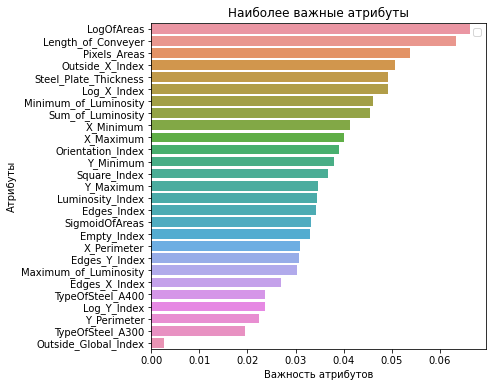

In [35]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [36]:
model_pred = model.predict(X_test_22)

print(classification_report(y_test_22, model_pred))

model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       121
           1       0.94      0.88      0.91        17
           2       0.98      0.94      0.96       125
           3       0.71      0.75      0.73       193
           4       0.82      0.43      0.57        53
           5       0.84      0.84      0.84        19
           6       0.87      0.85      0.86        55

    accuracy                           0.78       583
   macro avg       0.83      0.78      0.80       583
weighted avg       0.79      0.78      0.78       583



0.7821612349914236

In [37]:
df = df_norm
df['target'] = Y
df

,X_Minimum,Y_Minimum,Pixels_Areas,Y_Perimeter,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,-0.950733,-0.959296,-0.996528,-0.995262,-0.251232,-0.342593,0.622575,1.0,-0.692308,-0.899920,...,-0.074269,1.000000,1.0,-0.129375,-0.565757,-0.228168,0.824986,-0.137599,0.051532,4
1,-0.243402,-0.609987,-0.998611,-0.996805,-0.172414,-0.203704,0.622575,1.0,-0.692308,0.536777,...,0.188312,0.930013,1.0,-0.290393,-0.655836,-0.313218,0.799667,0.003413,-0.592736,4
2,-0.027566,-0.761620,-0.999096,-0.998017,-0.024631,-0.185185,0.396825,1.0,-0.538462,0.951367,...,0.492695,0.889449,1.0,-0.364982,-0.655836,-0.410477,0.672164,0.067764,-0.782066,4
3,0.000587,-0.944125,-0.997720,-0.995152,-0.024631,-0.175926,-0.555556,-1.0,0.923077,0.464429,...,0.063515,1.000000,1.0,-0.203514,-0.607587,-0.223613,0.851415,0.026325,-0.086947,4
4,0.512023,-0.924294,-0.968464,-0.971462,-0.635468,-0.175926,-0.555556,-1.0,0.115385,-0.860330,...,-0.454343,0.975830,1.0,0.261925,-0.329631,0.131754,0.941595,-0.025350,1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,-0.707918,-0.950841,-0.996449,-0.997686,0.172414,-0.037037,-0.530864,-1.0,-1.000000,-0.264068,...,0.022930,0.426860,-1.0,-0.125402,-0.173344,-0.434522,-0.432693,0.220597,0.376617,3
1937,-0.831085,-0.948560,-0.996266,-0.997466,0.103448,-0.111111,-0.530864,-1.0,-1.000000,-0.574357,...,0.400568,0.386927,-1.0,-0.116513,-0.141466,-0.422124,-0.455893,0.146496,0.585244,3
1938,-0.829912,-0.941442,-0.996201,-0.997686,0.182266,-0.046296,-0.530864,-1.0,-1.000000,-0.571543,...,0.441964,0.331232,-1.0,-0.113441,-0.162381,-0.447672,-0.487366,0.223766,0.336890,3
1939,-0.839296,-0.935939,-0.994537,-0.994931,0.152709,-0.046296,-0.530864,-1.0,-1.000000,-0.595056,...,-0.338880,0.284573,-1.0,-0.049215,-0.121921,-0.299598,-0.061482,0.196587,0.981612,3


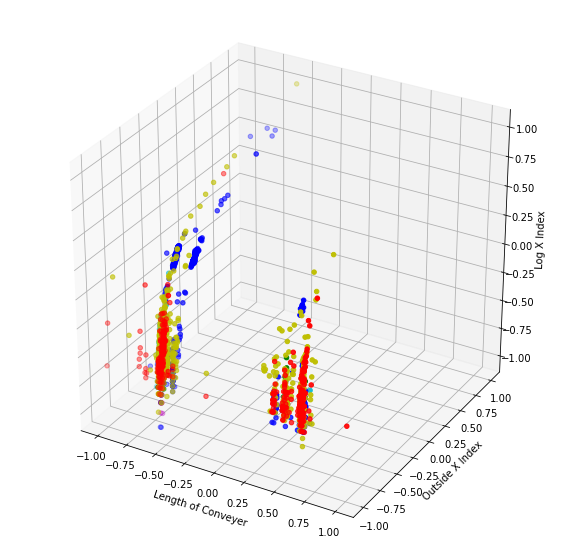

In [38]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

colors = ['r', 'g', 'b', 'y', 'b', 'm', '#17becf']

for i in range(7):
  
  a = df.loc[df['target'] == i, 'Length_of_Conveyer']
  b = df.loc[df['target'] == i, 'Outside_X_Index']
  c = df.loc[df['target'] == i, 'Log_X_Index']

  ax.scatter(a, b, c, c=colors[i])

ax.set_xlabel('Length of Conveyer')
ax.set_ylabel('Outside X Index')
ax.set_zlabel('Log X Index')
plt.show()

In [39]:
#Принцип минимальных компонент
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
# Уменьшаем количество атрибутов таблицы,
# проецируя все атрибуты в новое пространство,
# составленное методом минимальных компонент (всего выбрано 3 самых важных вектора для пространства)
principalComponents = pca.fit_transform(df_norm)
projected_x = pd.DataFrame(data = principalComponents,
                           columns = ['atribute_1', 'atribute_2', 'atribute_3'])
# После применения PCA осталось только 3 атрибута

# Таргет значения (класс дефекта) не изменился для векторов, спроецированных в данное пространство


In [40]:
projected_x['target'] = Y

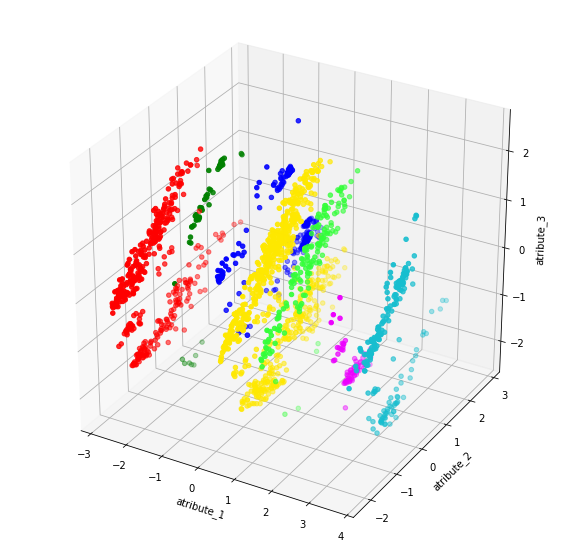

In [41]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

colors = ['r', 'g', 'b', '#FFE800', '#33FF39', '#EC00FF', '#17becf']

for i in range(7):
    a = projected_x.loc[projected_x['target'] == i, 'atribute_1']
    b = projected_x.loc[projected_x['target'] == i, 'atribute_2']
    c = projected_x.loc[df['target'] == i, 'atribute_3']
    ax.scatter(a, b, c, c=colors[i])

ax.set_xlabel('atribute_1')
ax.set_ylabel('atribute_2')
ax.set_zlabel('atribute_3')
plt.show()

In [42]:
# Увеличим количество элементов в таблице для уравновешивания классов.

# Будем использовать библиотеку imblearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_norm,
                                                 Y,
                                                 test_size = 0.3,#%70 train, 30% test
                                                 random_state = 3)

In [43]:
# Увеличим количество тренировочных данных (тестовые данные остаются нетронутыми)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 1358
Количество элементов после операции: 3248


In [44]:
# Мы увеличили количество элементов, и уравняли классы по количеству
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0: 464, 1: 464, 2: 464, 3: 464, 4: 464, 5: 464, 6: 464}

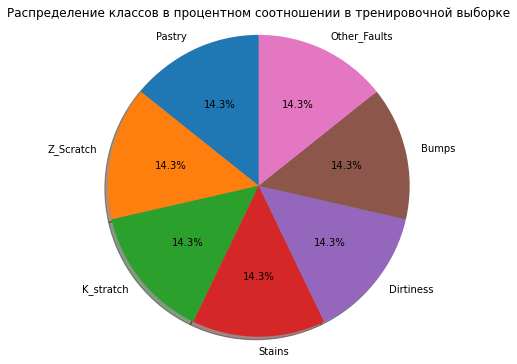

In [45]:
# Построем pie-график
labels = 'Pastry', 'Z_Scratch', 'K_stratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'
sizes = [464, 464, 464, 464, 464, 464, 464]
explode = (0, 0, 0.0, 0, 0, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Распределение классов в процентном соотношении в тренировочной выборке')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [46]:
# Но в тестовых данных остается несбалансированность.
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 117, 1: 16, 2: 102, 3: 209, 4: 53, 5: 19, 6: 67}

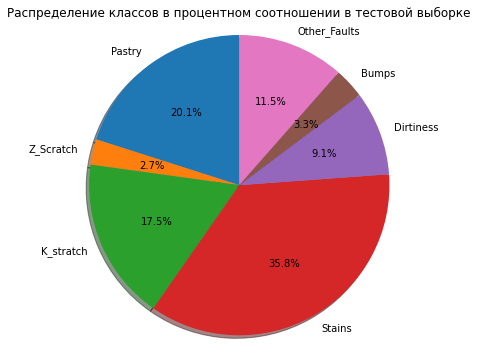

In [47]:
# Построем pie-график
labels = 'Pastry', 'Z_Scratch', 'K_stratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'
sizes = [117, 16, 102, 209, 53, 19, 67]
explode = (0, 0, 0.0, 0, 0, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Распределение классов в процентном соотношении в тестовой выборке')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [48]:
# Применим алгоритм логистической регрессии:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       117
           1       1.00      0.81      0.90        16
           2       0.99      0.99      0.99       102
           3       1.00      1.00      1.00       209
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        67

    accuracy                           0.99       583
   macro avg       0.99      0.97      0.98       583
weighted avg       0.99      0.99      0.99       583



In [49]:
# Разделим датасет на 10 частей, предварительно перемешав все элементы между собой.
shuffled = df_norm
shuffled = shuffled.sample(frac=1)
shuffled = shuffled.reset_index(drop=True)

In [50]:
from sklearn import metrics

part = len(shuffled)//10

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

mean_score = 0
for i in range(10):
    test = shuffled[i*part:(i+1)*part]
    train = shuffled.drop(shuffled.index[i*part:(i+1)*part])
    # обучаем модель
    train_x = train.drop(['target'], axis=1)
    train_y = train.target
    test_x = test.drop(['target'], axis=1)
    test_y = test.target
    model.fit(train_x, train_y)

    model_pred = model.predict(test_x)
    mean_score += metrics.accuracy_score(test_y, model_pred)
    
print(mean_score/10)

0.7855670103092783


In [ ]:
# Кросс-валидация показала, что точность алгоритма деревьев решений 78%